<a href="https://colab.research.google.com/github/Prince0420/Airbnb-NYC-Data-Analysis/blob/main/Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

## Introduction to Airbnb 
Airbnb is an online marketplace connecting travelers with local hosts. On one side, the platform enables people to list their available space and earn extra income in the form of rent. On the other, Airbnb enables travelers to book unique homestays from local hosts, saving them money and giving them a chance to interact with locals. Catering to the on-demand travel industry, Airbnb is present in over 190 countries across the world.

The data we are going to analyse is the data of Airbnb NYC (2019). Our main objectives of analysis will be above four statements which can be briefed as learnings from hosts, areas, price, reviews, locations etc. but not limited to.we will also try to explore some more insights.

I am very excited in exploring this dataset. 
## So let's get started

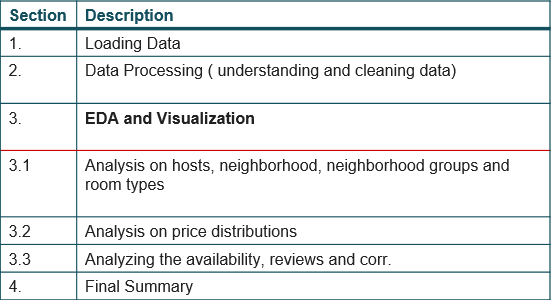

##Let's deep dive into the data and get insights 
### 1. Loading data

In this section we will perform certain basic tasks such as we will mount our drive, import neccessary libraries and we will look at top rows of our data.

In [ ]:
# mount the drive and read required data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import necessary libreries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [ ]:
# Loading data and storing it in a dataframe df
df = pd.read_csv('/content/drive/MyDrive/Alma better/Airbnb NYC 2019.csv')

In [ ]:
# looking at the head(top 5 rows)
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## 2.Data Processing ( understanding and cleaning data)

###2.1 Basic information of data
In this section we see shape of our data, basic info( such as what columns do we have what data types it contains) how many missing values do have, what columns are important what columns can be dropped, we will describe our data and we will fill missing values based some specific assumptions. 

In [ ]:
# get the shape of our data
df.shape

(48895, 16)

In [ ]:
# exploring basic infor about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
# checking what all columns do we have
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
#checking null values in different columns
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

### 2.2 Dropping unwanted columns, Cleaning and describing data
let's move ahead and find out some more facts about data in order to find usefull columns. for better analysis we will minimize the columns which has very large unique values.

In [ ]:
# exploring the unique values in each column for this we will create two lists one referring column name and the other one is list of unique values


# Columns list
columns = df.columns

# unique values list
unique_values = []
for i in columns:
  x= df[i].nunique()
  unique_values.append(x)



In [ ]:
# Creating a Dataframe of unique values with respect to the columns
unique_val_df = pd.DataFrame({'Columns_name': columns, 'unique_values': unique_values})
unique_val_df

,Columns_name,unique_values
0,id,48895
1,name,47905
2,host_id,37457
3,host_name,11452
4,neighbourhood_group,5
5,neighbourhood,221
6,latitude,19048
7,longitude,14718
8,room_type,3
9,price,674





### Notice that we have some columns which can be irrelavent to our analysis and these are.
1. id (Since all the values in id column are unique hence this column has no use in analysis).
2. name (Since we have 47905 unique values and some missing values hence this column also has no use in analysis )
3. last_review (it's simply the date of review and since we already have num_of_reviews and reviews_per_month so we can drop this one )

we can drop these columns

Also -

Since we have 11452 unique name and some null values let's fill these values with no name since the number of missing values is quite small in comparison of length of dataset

Notice that we have 10052 missing values in reviews_per_month column. Since this column just contains the number of reviews per month we can assume that there was no review at missing places. Basis this assumption we can replace these null values with zero. 
 

In [ ]:
# dropping unwanted columns
df =df.drop(['id', 'last_review','name'], axis =1)

In [ ]:
# filling null values in host_name column with no_name
df['host_name'].fillna('no_name', inplace=True)

# getting rid of null values in reviews per month column
df['reviews_per_month'].fillna(0, inplace = True)

In [ ]:
# checking null values across data
df.isnull().sum()

host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [ ]:
# Describing our data to understand data
df.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


## Summary (Section 2 : Understanding and cleaning data)
### Observations 2.1 
in this section we have seen shape of this data we summarise that this data contains 48895 rows and 16 columns. By looking at the info of this data it's well understood that these columns has various data type such as int, float, string(object). We can also summarise that  data helps us to understand that there are some missing values across certain columns. (2.1)

### Observations 2.2
in this section first we found how many unique values are availablein each column then we removed some unwanted columns (such as id, name and last_review).
we have 11452 host_names, 48895 id's and 37457 host_id's. With this information we can conclude that a host(name) is containing more than id's and host_id's based on different properties. we also have filled these values by applying some specific assumptions.and finally when our dataset is ready for EDA we have described our data.  (2.2)



Great ! We have cleaned our data and we are ready to analyse Airbnb data. Let's enter into the Exploratory data analysis.

#3. EDA and Visualization

##3.1 Analysis on hosts, neighbourhood, neighbourhood groups and room types

In this section we will focus on analyzing four major categorical columns named host_name, neighbourhood, neighbourhood groups and room types. We will also plot distributions of room type across various neighbourhood and neighbourhood groups.for this- we will find our top 10 host_id's having most listings. In order to get the same we will use groupby operation on host_id column and will calculate the total count of each host_id. Our next action will be to study the total listings in each neighbourhood group. for this- we will simply use the value_counts functionality over n.group. then we will visualize the total listings in each neighbourhood_group along with room type.We will also explore the various room type proportion by using a pie chart. our next motive will be to tabulate top 10 listed neighbourhoods. for this- we will use groupby operation on nieghbourhood.



In [ ]:
# let's explore what unique neighbourhood group we have
df.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [ ]:
# exploring what different room type do we have
df.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

#### Exploring top 10 host name having most number of listings.

In [ ]:
# getting top 10 host names having most number of listings
top_host =pd.DataFrame(df.groupby(['host_id', 'host_name'])['host_id'].count().sort_values(ascending =False).head(10))
top_host.rename(columns = {'host_id': 'Total_listings'})

,,Total_listings
host_id,host_name,
219517861,Sonder (NYC),327
107434423,Blueground,232
30283594,Kara,121
137358866,Kazuya,103
16098958,Jeremy & Laura,96
12243051,Sonder,96
61391963,Corporate Housing,91
22541573,Ken,87
200380610,Pranjal,65





### Let's explore the neighbourhood groups and room type distribution across NYC

In [ ]:
# getting neighbourhood_group distribution and converting it into a dataframe

neig_dist = pd.DataFrame(df['neighbourhood_group'].value_counts()).reset_index()
neig_dist.rename(columns = {'index':'neighbourhood_group','neighbourhood_group': 'listing_counts' })

,neighbourhood_group,listing_counts
0,Manhattan,21661
1,Brooklyn,20104
2,Queens,5666
3,Bronx,1091
4,Staten Island,373


### Plot 1 
###Neighbourhood_group  distribution across NYC

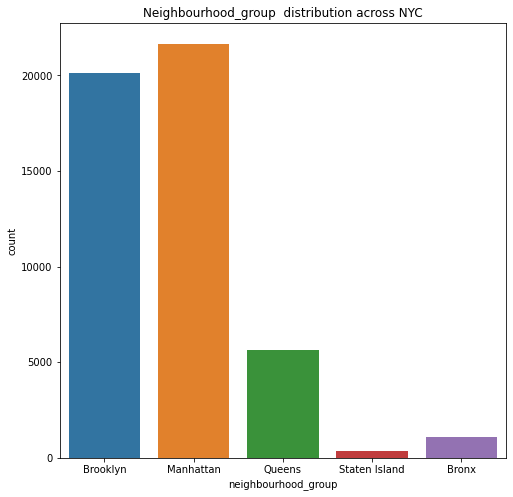

In [ ]:
# plotting this data
plt.figure(figsize = (8,8))
sns.countplot(data = df, x= 'neighbourhood_group')
plt.title('Neighbourhood_group  distribution across NYC')
plt.show()

### Plot 2 Traffic distribution

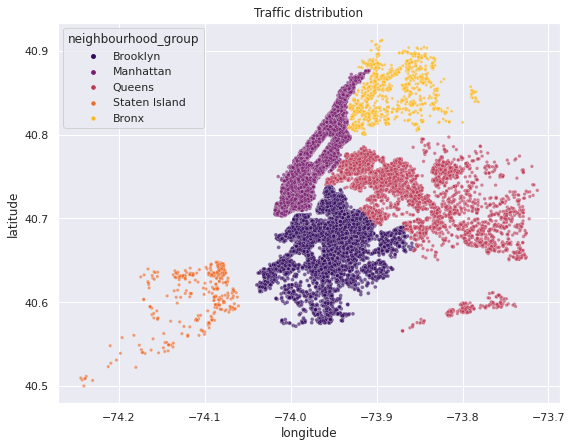

In [ ]:
# plotting scatterplot to view the traffic across NYC
plt.figure(figsize = (9,7))
sns.set(style="darkgrid")

sns.scatterplot(data= df, y= 'latitude', x= 'longitude', hue= 'neighbourhood_group', palette ='inferno', sizes=(10,15), size='neighbourhood_group', alpha =0.6)
plt.title('Traffic distribution')

plt.show()




##  Let's look at the distribution of room type across various groups

### Plot 3
### distribution of room type across various groups

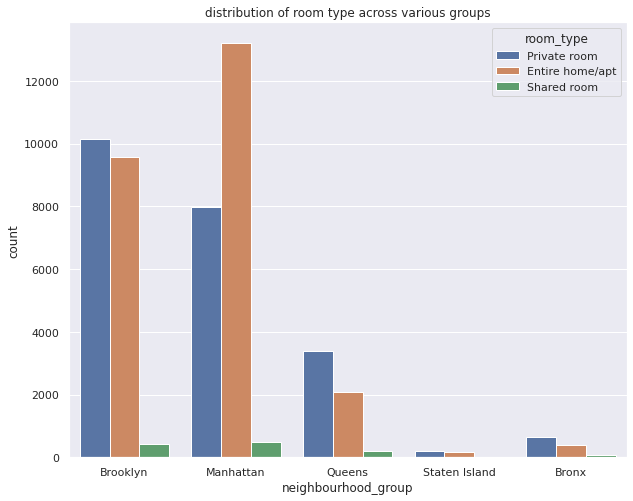

In [ ]:
# Plotting distribution of room type across various groups
plt.figure(figsize= (10,8))
sns.set(style="darkgrid")


sns.countplot(data = df, x= 'neighbourhood_group' , hue= 'room_type')
plt.title('distribution of room type across various groups')
plt.show()



#### Hey, did you notice that there is almost no contribution of shared rooms ? In order to understand this anamoly let's plot room type across data.

### Plot 4
### Distribution of room Type

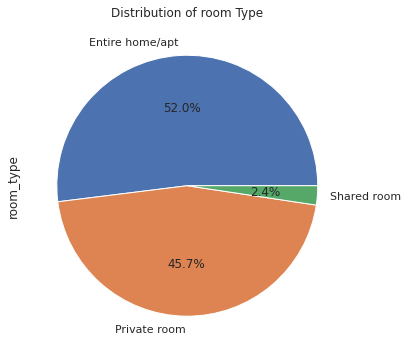

In [ ]:
# we can understand the distribution of room type across the data
sns.set(style="darkgrid")


plt.figure(figsize = (8,6))
df['room_type'].value_counts().plot.pie(autopct="%.1f%%");
plt.title('Distribution of room Type')
plt.show()



we can summarise it in a table.

In [ ]:
# creating a table of percentage of each type of room 
room_type_dist = pd.DataFrame(df.room_type.value_counts()/len(df)*100).reset_index()
room_type_dist.rename(columns = {'index': ' Room Type', 'room_type': 'Percentage_of_room_type'})

,Room Type,Percentage_of_room_type
0,Entire home/apt,51.966459
1,Private room,45.661111
2,Shared room,2.372431





Let's find top 10 neighbourhoods having highest number of listings in NYC and plot them across various room types

In [ ]:
# finding the top10 neighbourhoods in terms of listing
n_df = pd.DataFrame(df.groupby(['neighbourhood', 'neighbourhood_group'])['neighbourhood'].count().sort_values(ascending=False).head(10))
n_df.rename(columns = {'neighbourhood': 'total_listings'}, inplace = True)
n_df


,,total_listings
neighbourhood,neighbourhood_group,
Williamsburg,Brooklyn,3920
Bedford-Stuyvesant,Brooklyn,3714
Harlem,Manhattan,2658
Bushwick,Brooklyn,2465
Upper West Side,Manhattan,1971
Hell's Kitchen,Manhattan,1958
East Village,Manhattan,1853
Upper East Side,Manhattan,1798
Crown Heights,Brooklyn,1564


### Plot 5
### distribution of room type in top10 neighbourhoods

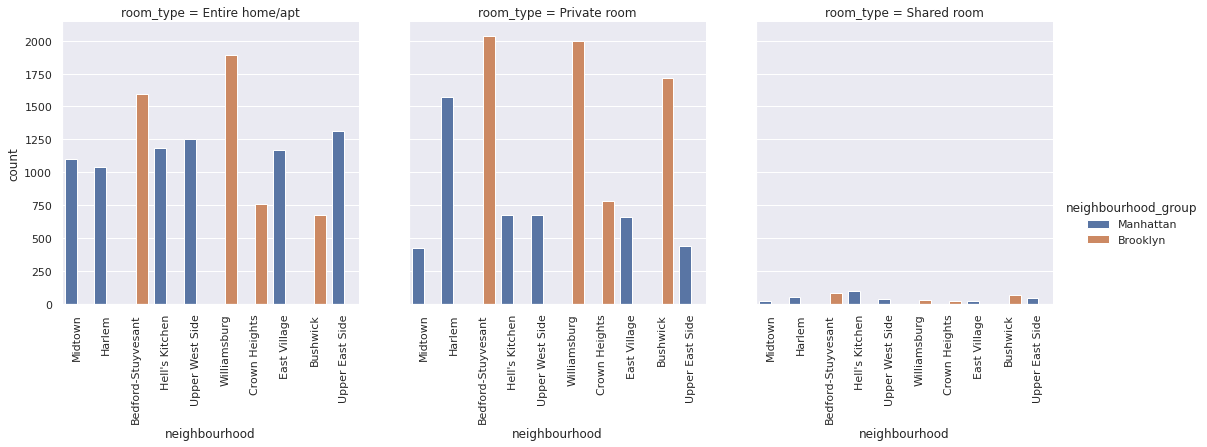

In [ ]:
#creating a data frame of above values
df1=df.loc[df['neighbourhood'].isin(['Williamsburg','Bedford-Stuyvesant','Harlem','Bushwick',
                 'Upper West Side','Hell\'s Kitchen','East Village','Upper East Side','Crown Heights','Midtown'])]
#using catplot to represent multiple interesting attributes together and a count
viz=sns.catplot(x='neighbourhood', hue='neighbourhood_group', col='room_type', data=df1, kind='count',)
viz.set_xticklabels(rotation=90)
plt.show()

## Summary (Section 3:  Leanrings from, host_name Neighbourhood, neighbourhood groups, room type)

1. We have found that most listed host id sonder (NYC) having 327 listings followed by Blueground(232 listings).
2. We also have noticed that the most listings are registered in Manhattan followed by Brooklyn and so on.
3. Although Manhattan has hisghest listings but in terms of private rooms Brooklyn is leading.
4. We found that most listed room type is Entire room/apt(approx 52%) followed by private rooms(45%) and there is very small proportion of shared room (only approx 2%). 
5. We also have found that in top 10 neighbourhoods only Manhattan and Brooklyn groups take part. And the most listed neighbourhood is Williamsburg then Bedford-Stuyvesant	and so on.


##3.2 Analysis on price distributions
This section will be one of the most useful and important section of our analysis.Hence, we will continue this analysis in various steps .In this section first we will try to visualize price across the entire NYC and see whether there are outliers in our dataset or not. for this- we will use a scatter plot in such a way that outliers are highlighted. in next step we will limit the price and see the range of price where price distribution is much more denser. for this- we will use distplot and limit our price by some range.
Then we will create a table for mean, median, max, min and some percentiles of price accross each neighbourhood group. In next step we will use violin plot by limiting price again and see the noise of price id each neighbourhood. Finally, we will group our host_id's to understand the revenue proportion occupied by each host_group.
###  Price Distributions in terms of amounts

### Plot 6
### Ditribution of price across NYC

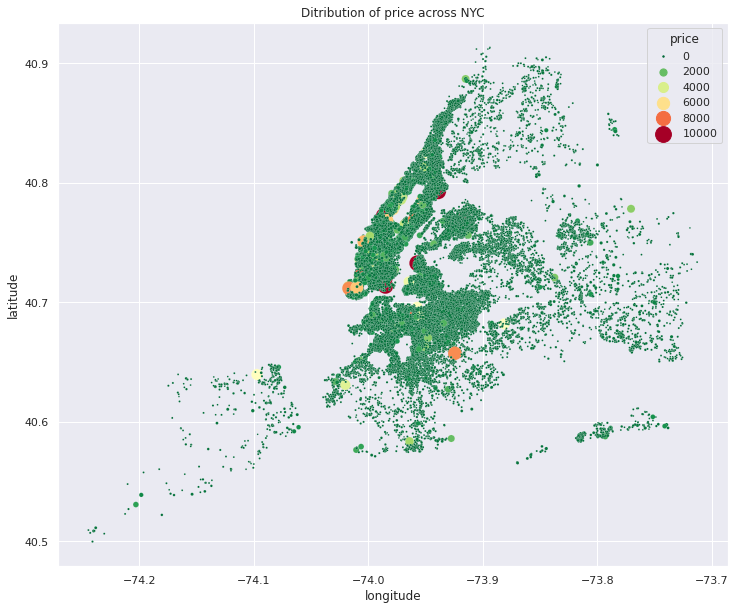

In [ ]:
# Plotting the Scatter plot to visualize the price distribution in a way that outliers are highlighted
plt.figure(figsize = (12,10))
sns.set(style="darkgrid")

sns.scatterplot(data= df, y = 'latitude', x= 'longitude', hue= 'price', palette ='RdYlGn_r', sizes= (2,250),size = 'price',  )
plt.title('Ditribution of price across NYC')
plt.show()



Hey ! did you know notice that there are some outliers in price. 

### Let's plot price distribution limiting it by 300 we will use histogram to visualize this. this will help us to understand that in what range price fall more likely.


###Plot 7 
#### distribution of price limiting by 300 USD across NYC

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


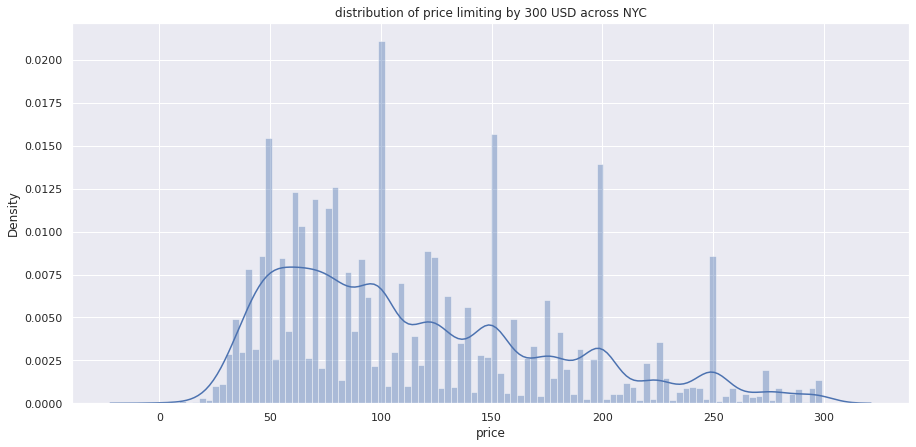

In [ ]:
# plotting price distribution by limiting price by 300
plt.figure(figsize = (15,7))
sns.set(style="darkgrid")

price =df[df['price']<300]['price']
sns.distplot(price,kde=True, bins = 100)
plt.title('distribution of price limiting by 300 USD across NYC')
plt.show()



We can see that price distribution has more counts between 30 to 150.


## Let's look at the price(min, max, and some quantiles)
To understand the price we will use mean,median, max, min 75,90 and 97 percentiles so that we can analyse price in more depth.

In [ ]:
# 75th Percentile
def Q75(x):
    return x.quantile(0.75)

# 90th Percentile
def Q90(x):
    return x.quantile(0.9)

# 97th Percentile
def Q97(x):
    return x.quantile(0.97)
df.groupby('neighbourhood_group').agg({'price':['median','mean','min',Q75, Q90,Q97,'max']})


price                                            
                    median        mean min    Q75    Q90    Q97    max
neighbourhood_group                                                   
Bronx                 65.0   87.496792   0   99.0  145.0  282.4   2500
Brooklyn              90.0  124.383207   0  150.0  210.0  350.0  10000
Manhattan            150.0  196.875814   0  220.0  333.0  599.0  10000
Queens                75.0   99.517649  10  110.0  175.0  275.0  10000
Staten Island         75.0  114.812332  13  110.0  184.0  299.0   5000

This table is showing us the price at  different levels.


## Let's now plot the mean of the price across the groups

##  We can also analyse price across various neighbourhood groups

In [ ]:
price_dist =df.groupby('neighbourhood_group').agg({'price':'mean'})
price_dist.reset_index(inplace =True)
price_dist = price_dist.rename(columns = {'price': 'mean_price'})

### Plot 8
#### mean price across different neighbourhood groups

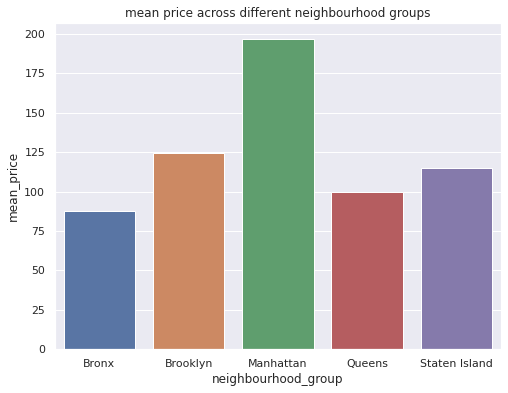

In [ ]:
# plotting the above distribution
plt.figure(figsize = (8,6))

sns.barplot(data = price_dist, x = 'neighbourhood_group', y= 'mean_price')
plt.title('mean price across different neighbourhood groups')
plt.show()




by looking at this graph we can conclude that Manhattan has highest mean price to understand the price distribution in more depth.

### let's understand the distribution of price across neighbourhood_gorups using violin plots. for this we will limit price by 500 to not to involve outliers in our findings.

### Plot 9



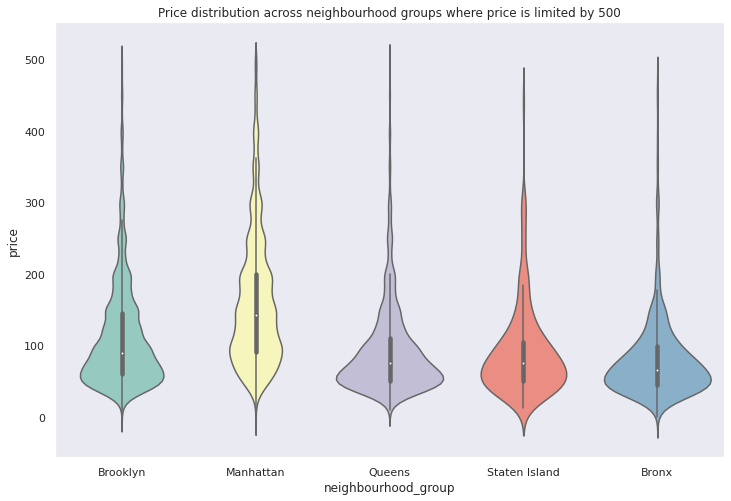

In [ ]:
plt.figure(figsize = (12,8))
sub_data=df[df.price < 500]
sns.set(style="dark")

sns.violinplot(data= sub_data, x= 'neighbourhood_group', y = 'price', palette ='Set3')
plt.title('Price distribution across neighbourhood groups where price is limited by 500')
plt.show()




with this plot we can summarise the Manhattan has highest noise in price follwed by Brooklyn and so on.

###  Now we will try to understand the revenue by various top_hosts groups. for this we will create a sub dataset of different bins and will plot the same.

Before that let's understand how the hosts are behaving. To understand this first we look at a host name Sonder NYC

In [ ]:
df.loc[df['host_name']=='Michael']

,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
151,62165,Michael,Brooklyn,Prospect Heights,40.67386,-73.96641,Private room,85,15,9,0.09,1,339
412,674970,Michael,Brooklyn,Greenpoint,40.72212,-73.94254,Entire home/apt,141,5,8,0.21,1,9
519,179020,Michael,Manhattan,Hell's Kitchen,40.76311,-73.99388,Private room,99,1,89,1.00,1,353
616,1220414,Michael,Manhattan,Hell's Kitchen,40.76166,-73.99675,Entire home/apt,179,30,83,0.88,1,292
811,632334,Michael,Brooklyn,Carroll Gardens,40.68353,-73.99140,Entire home/apt,189,2,13,0.18,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48378,272485928,Michael,Manhattan,SoHo,40.72336,-74.00465,Entire home/apt,600,3,0,0.00,1,179
48531,25498509,Michael,Brooklyn,Clinton Hill,40.68183,-73.96464,Entire home/apt,100,1,0,0.00,1,6
48786,266645207,Michael,Queens,Laurelton,40.67025,-73.74548,Private room,75,1,0,0.00,2,180
48830,151831356,Michael,Manhattan,Midtown,40.74607,-73.98599,Entire home/apt,199,1,0,0.00,1,14


With this we can summarise that a host name may have many host id's and properties. We will use this into our analysis

In [ ]:
# creating a dataframe 
revenue_df=pd.DataFrame(df.groupby('host_id')['price'].sum().sort_values(ascending= False))


In [ ]:
# creating various group of hosts and storing into a list. and defing one more list having names of these groups
m = []
n = ['top_100', 'top_500', ' top_1000', ' top_2000', ' top_5000','top_10000','rest_27457', 'all_hosts']
for i in [100,500,1000,2000,5000,10000,27457,37457]:
  if i in range(10,10001):
    total_price =revenue_df.head(i).price.sum()
    m.append(total_price)
  elif i <27458: 
    m.append(revenue_df.tail(27457).price.sum())
  else:
    m.append(revenue_df.tail(37457).price.sum())

In [ ]:
# creating a new sub data set of above two lists
revenue_dist_df = pd.DataFrame({'host_groups': n, 'revenue_of_group':m})

In [ ]:
# adding a new column named percentage_occupied
revenue_dist_df['percentage_occupied']= (revenue_dist_df['revenue_of_group']/df.price.sum()*100).round(2)
revenue_dist_df

,host_groups,revenue_of_group,percentage_occupied
0,top_100,880814,11.80
1,top_500,1485833,19.90
2,top_1000,1874550,25.10
3,top_2000,2398463,32.12
4,top_5000,3431809,45.96
5,top_10000,4582349,61.37
6,rest_27457,2884929,38.63
7,all_hosts,7467278,100.00


## Plot 10

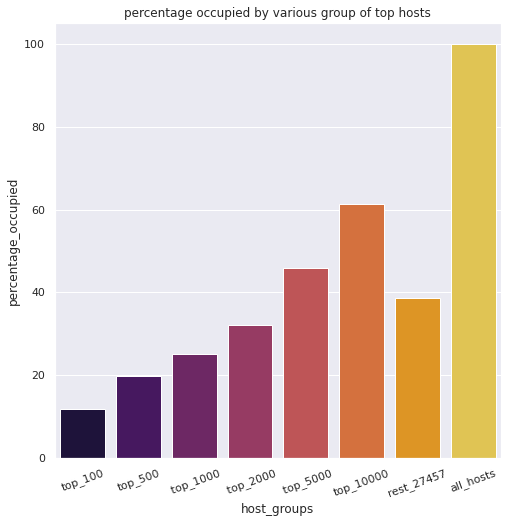

In [ ]:
#plotting the barplot between host_groups and percentage occupied by host groups
plt.figure(figsize = (8,8))
sns.set(style="darkgrid")
p =sns.barplot(data=revenue_dist_df, x= 'host_groups', y='percentage_occupied', palette ='inferno')
plt.xticks(rotation = 20)
plt.title('percentage occupied by various group of top hosts')
plt.show()



this plot is showing us that top 1000 hosts gained 67% of all revenue. you can also see percentage occupeid by other groups


## Summary (Section 3.2:  Leanrings from price across price range, neighbourhood groups, top host categories.

1. We have observed that we have some outliers in our dataset using scatterplot we are able to understand that these outliers lies in some specific neighbourhoods and in rest price is approximately uniformly distributed. 
2. Price is  more distributed across the dataset in a specified range (20,300). also there are some outliers.
3. We also noticed that Manhattan has highest mean and median price.
4. We can also summarise that Manhattan has highest noise in price follwed by Brooklyn and so on.
5. Another very interesting insights we found by analyzing revenue made by top hosts(top revenue makers) that top1000 hosts occupy approx 25% of all revenue and top 1000 occupy approx 61% of all revenue.


  
  # 3.3 Analysing the availabilty, reviews and corr.

  In this section we will focus on availability , reviews and correlation matrix. We will also look at the busiest hosts in NYC along with their availability, listings and revenues made by them. In correlation part we see what are the correlation between different features. Our excution plan for this section will be as follows- first we will plot our availability across entire NYC and notice if the is some area which has low/high availability, since we have very high no. of entries a plot might not be insigtful hence we will also see mean and median in tabular format. then we will find our busiest top 10 hosts. for this we will assume that a host will be the busiest who has highest number of listings and less average availability. then we will understand the reviews neighbourhood_group wise. then we will which hosts has highest number of reviews. finally we will plot correlation matrix to see the which features is correlated with other feature.


## analysis on the availability.
 for this first we will calculate the mean of availability across groups and then we will see the plot for it.

In [ ]:
# calculating the mean of availability across various groups
df.groupby('neighbourhood_group').agg({'availability_365':['mean']})

,availability_365
,mean
neighbourhood_group,
Bronx,165.758937
Brooklyn,100.232292
Manhattan,111.979410
Queens,144.451818
Staten Island,199.678284


## Plot 11
#### availability distribution plot

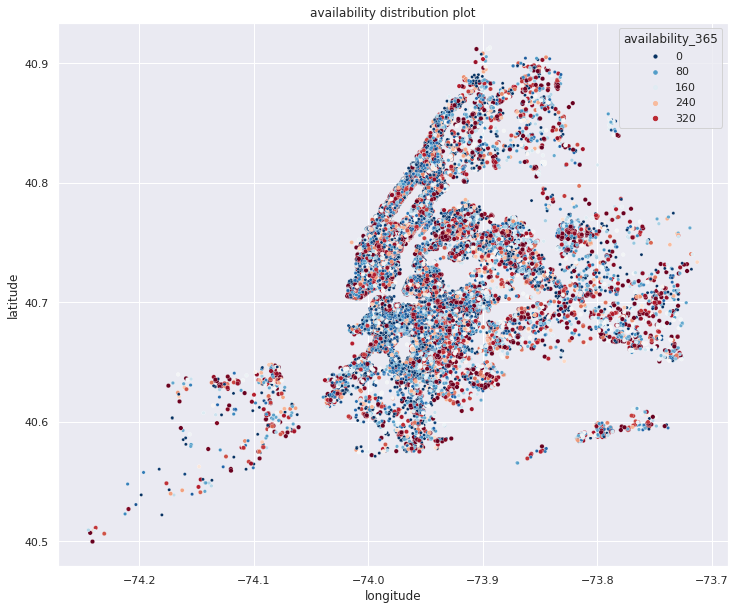

In [ ]:
# plotting the availability across various groups
plt.figure(figsize = (12,10))
sns.set(style="darkgrid")

sns.scatterplot(data= df, y= 'latitude', x= 'longitude', hue= 'availability_365', palette ='RdBu_r', size='availability_365', sizes=(10,20))
plt.title('availability distribution plot')
plt.show()



This plot help us to summarise that availability is distibuted across all the neighbourhoods in New York(NYC). 

##finding top 10 busiest hosts.

 We can assume that the busiest host is one who has highest no. of listing and lowest availablity. using this assumption we can find our busiest hosts.

In [ ]:
#Let's plot top 10 busiest host names for this we will group our dataframe by host name, their total listings and their average_availability

# Creating a new dataframe 
new=pd.DataFrame(df.groupby(['host_id','host_name']).agg({'price': 'sum', 'host_id': 'count','availability_365': 'mean' }))

# renaming the column names
new.rename(columns = {'host_id': 'total_listings', 'price': 'revenue', 'availability_365':'avg_availability'}, inplace =True)

# Sorting data to get the busiest hosts
new =new.sort_values(['total_listings', 'avg_availability'], ascending = [False, True]).round(2).reset_index()
new.head(10)


,host_id,host_name,revenue,total_listings,avg_availability
0,219517861,Sonder (NYC),82795,327,301.49
1,107434423,Blueground,70331,232,253.81
2,30283594,Kara,33581,121,313.42
3,137358866,Kazuya,4514,103,196.48
4,12243051,Sonder,20451,96,276.61
5,16098958,Jeremy & Laura,20060,96,292.32
6,61391963,Corporate Housing,13308,91,241.92
7,22541573,Ken,18743,87,312.17
8,200380610,Pranjal,18865,65,338.03
9,7503643,Vida,7758,52,297.71




##let's get the sum of reviews across groups

In [ ]:
# creating a table of sum of reviwes across neighbourhood groups
df.groupby('neighbourhood_group').agg({'number_of_reviews':'sum'})

,number_of_reviews
neighbourhood_group,
Bronx,28371
Brooklyn,486574
Manhattan,454569
Queens,156950
Staten Island,11541





### 5.4 Finally we will plot corr. matrix which will help us to understand the correlation across data features.

## Plot 12
#### Correlation matrix

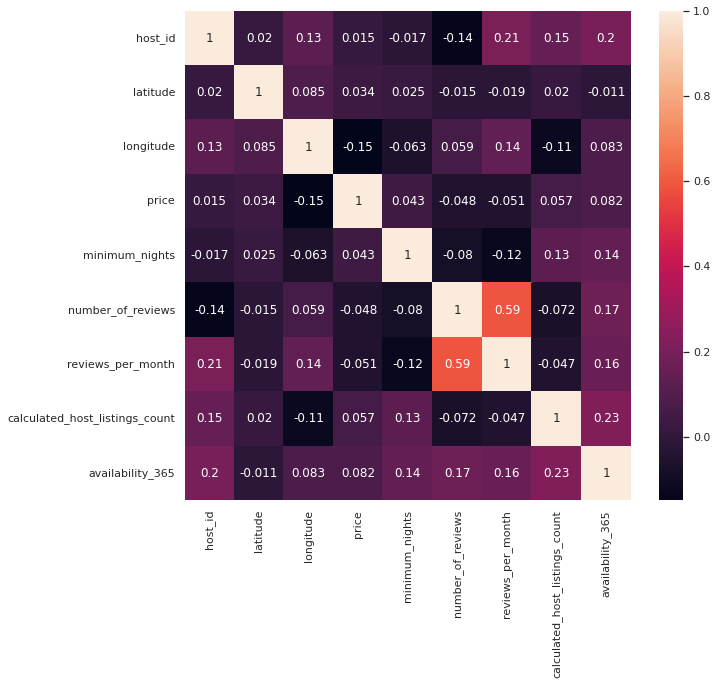

In [ ]:
# Plotting the corr. matrix
plt.figure(figsize= (10,9))

sns.heatmap(df.corr(), annot = True)
plt.show()

## Summary (Section 3.3: Analysing the availabilty, reviews and corr.)

1. we have noticed that the minimum avg. availability is in Brooklyn followed by Manhattan and the maximum availability is in Staten.
2. In section 5.2 we have found top 10 busiest hosts across NYC and noticed that Sonder (NYC) is the busiest host followed by 	Brooklyn& Breakfast -Len- and Danielle. This order is the as we had seen in section 2.1 for most listings. This can be due to high number of reviews as given in section 5.
3. In next section we have seen the reviews and found that the maximum reviwes in Brooklyn followed by Manhattan and the minimum in Staten.
4. in the section 5.4 we have found that there is a positive corr. between total listing counts and availability. and price is negatively corr. with longitude( this may be because Manhattan has highest price in data set and hence creating this anomoly).


# Final Summary

This Airbnb-NYC(2019) dataset is very informative dataset having 48895 rows and 16 columns. we have found that any host can have many id's and host_id's based on their properties(2.2). we have found hosts that take good advantage of the Airbnb platform and provide the most listings; we found that our top host has 327 listings.Then we have seen that Manhattan has highest number of listings followed by Brooklyn and so on. After that, we proceeded with analyzing neighbourhood groups ,neighborhoods and found that in top 10 neighbourhoods only Manhattan and Brooklyn groups take part . Then we moved to analyze price and observed that Price is  more distributed across the dataset in a specified range (20,300). also there are some outliers.Another very interesting insights we found by analyzing revenue made by top hosts(top revenue makers) that top1000 hosts occupy approx 25% of all revenue and top 10000 occupy approx 61% of all revenue . In final section we observed that we have noticed that the minimum avg. availability is in Brooklyn followed by Manhattan and the maximum availability is in Staten. then we have found top 10 busiest hosts across NYC and noticed that Micheal is the busiest host followed by David and Sonder(NYC). This order is the as we had seen in section 2.1 for most listings. This can be due to high number of reviews in the neighbourhood. Overall, we discovered a very good number of interesting relationships between features and explained each step of the process. This analysis can help leaders in high level business decisions, control over the platform, marketing initiatives, implementation of new features and much more. 

## Thank You
